In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-200-spotify-songs-dataset/Spotify_Dataset_V3.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',50)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#import csv file
df = pd.read_csv('/kaggle/input/top-200-spotify-songs-dataset/Spotify_Dataset_V3.csv', sep=';') # sep=';' is used because there was a problem with the csv file

# Let's do some data exploration and data cleaning

In [4]:
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [5]:
df.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL'],
      dtype='object')

In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rank                              651936 non-null  int64  
 1   Title                             651936 non-null  object 
 2   Artists                           651936 non-null  object 
 3   Date                              651936 non-null  object 
 4   Danceability                      651936 non-null  float64
 5   Energy                            651936 non-null  float64
 6   Loudness                          651936 non-null  float64
 7   Speechiness                       651936 non-null  float64
 8   Acousticness                      651936 non-null  float64
 9   Instrumentalness                  651936 non-null  float64
 10  Valence                           651936 non-null  float64
 11  # of Artist                       651936 non-null  o

(651936, 20)

In [7]:
# checking if there are any null values
df.isnull().sum()

Rank                                0
Title                               0
Artists                             0
Date                                0
Danceability                        0
Energy                              0
Loudness                            0
Speechiness                         0
Acousticness                        0
Instrumentalness                    0
Valence                             0
# of Artist                         0
Artist (Ind.)                       0
# of Nationality                    0
Nationality                         0
Continent                           0
Points (Total)                      0
Points (Ind for each Artist/Nat)    0
id                                  0
Song URL                            0
dtype: int64

# There aren't any null values

In [8]:
# let us check if there are some duplicate values in the dataset
df.duplicated().sum()

0

**We can see there are not any duplicate values**

In [9]:
# Let's see some statistical information about the dataset
df.describe()

,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
std,57.406664,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892
min,1.000000,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000


*Music is something which we enjoy within the range of sound, so we will check the range of loundness which should be (-60 to 0)dB*

In [10]:
(df['Loudness']<-60).value_counts()

True     587116
False     64820
Name: Loudness, dtype: int64

In [11]:
(df['Loudness']>0).value_counts()

False    651823
True        113
Name: Loudness, dtype: int64

**We saw that there are some values that are not in the range so we need to clean it **

In [12]:
# setting range
loud_range = (-60,0)
df = df[(df['Loudness'] >=loud_range[0]) & (df['Loudness'] <=loud_range[1])]

In [13]:
df.shape

(64707, 20)

*We can see that alot of values has been removed and the loudness is in range now.*

# EDA

/tmp/ipykernel_20/430007023.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


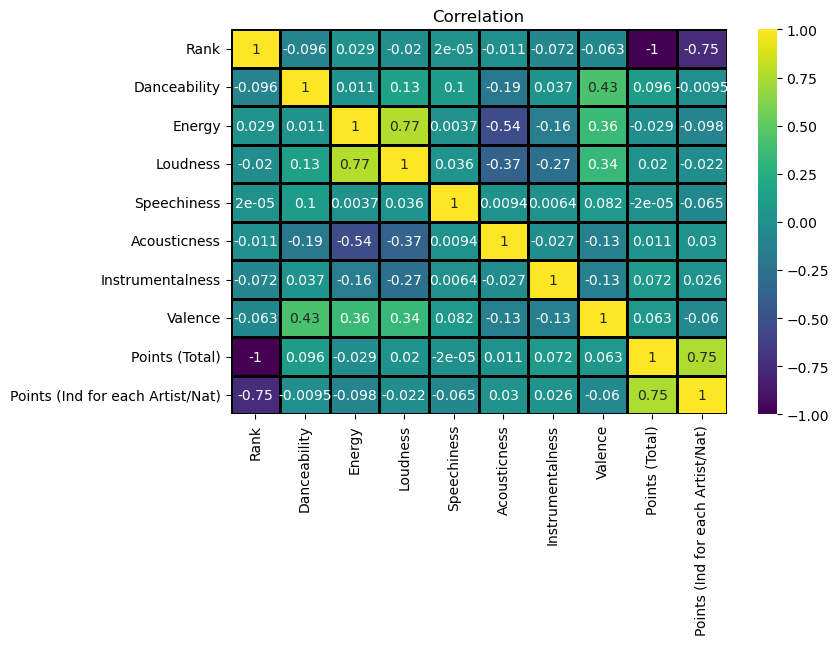

In [14]:
# let us make a correlation graph
correlation = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True, cmap='viridis', linewidth=0.9, linecolor="k")
plt.title('Correlation')
plt.show()

In [15]:
df.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL'],
      dtype='object')

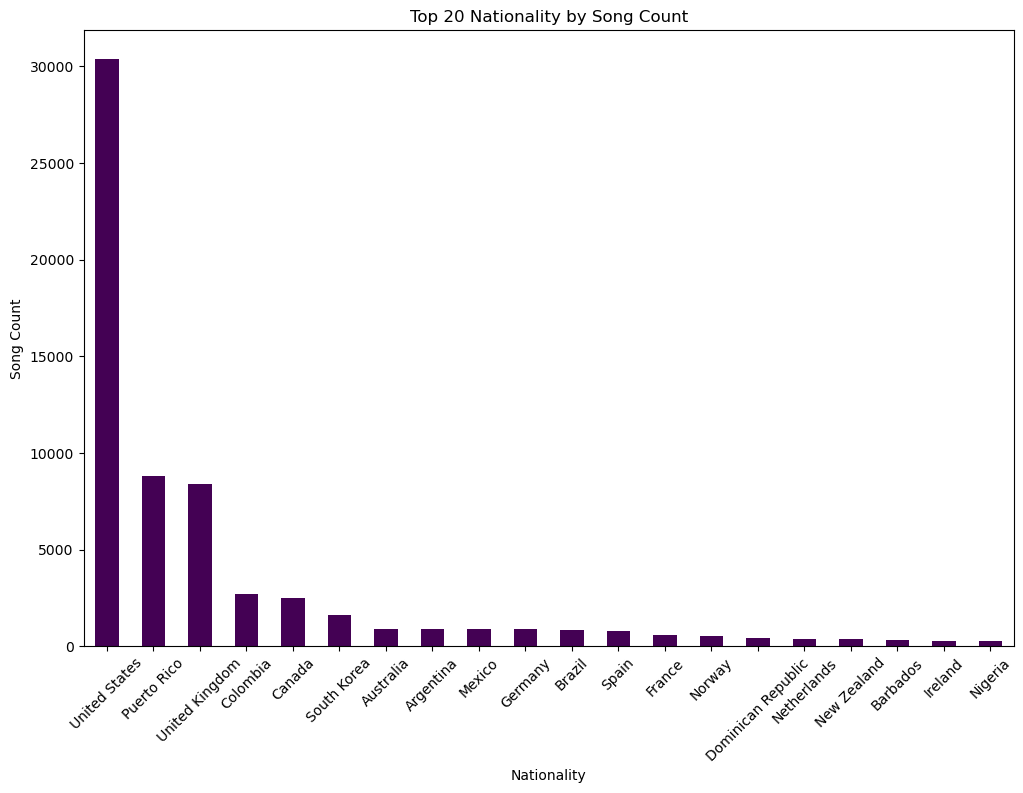

In [16]:
# Plotting top 20 nationalities by song count
top_nationalities = df['Nationality'].value_counts().head(20)
plt.figure(figsize=(12,8))
top_nationalities.plot(kind='bar', cmap="viridis")
plt.title('Top 20 Nationality by Song Count')
plt.xlabel('Nationality')
plt.ylabel('Song Count')
plt.xticks(rotation=45)
plt.show()

*From this we can see that number contribution is from US in the song counts*

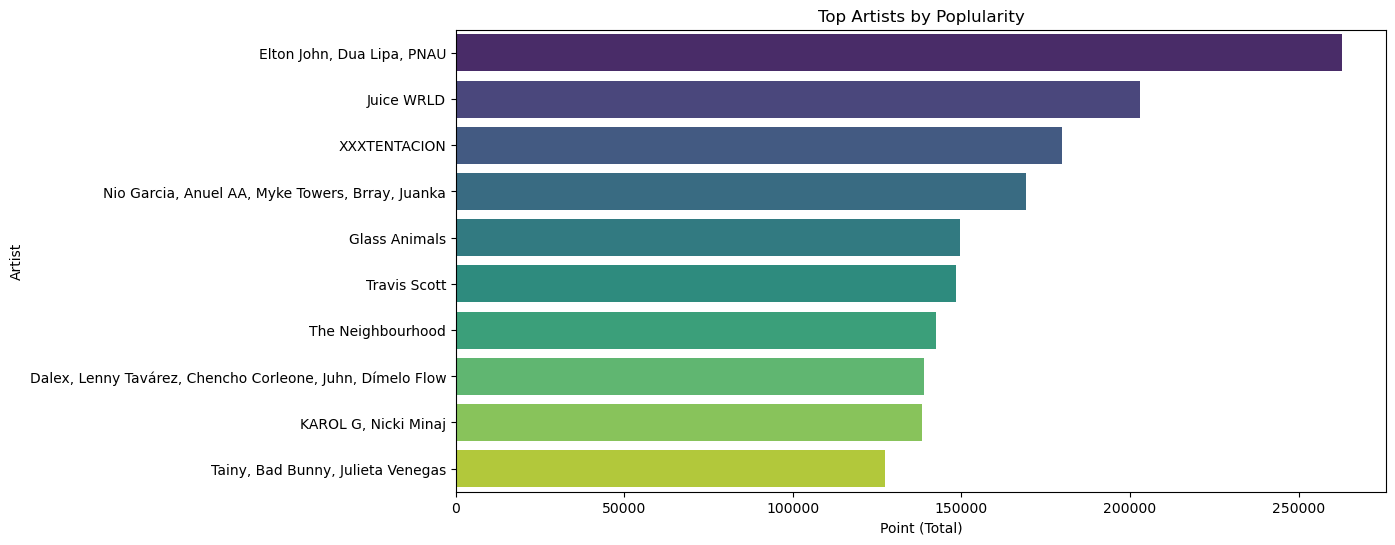

In [17]:
# Let's see the artist popularity based on the total points with the help of a plot
popular_artist = df.groupby('Artists')['Points (Total)'].sum()
top_artists = popular_artist.sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x = top_artists.values, y=top_artists.index, palette ='viridis')
plt.title('Top Artists by Poplularity')
plt.xlabel('Point (Total)')
plt.ylabel('Artist')
plt.show()

*From this graph we can see that Elton John, Dua Lipa, PNAU has gained more poplularity based on their points.*

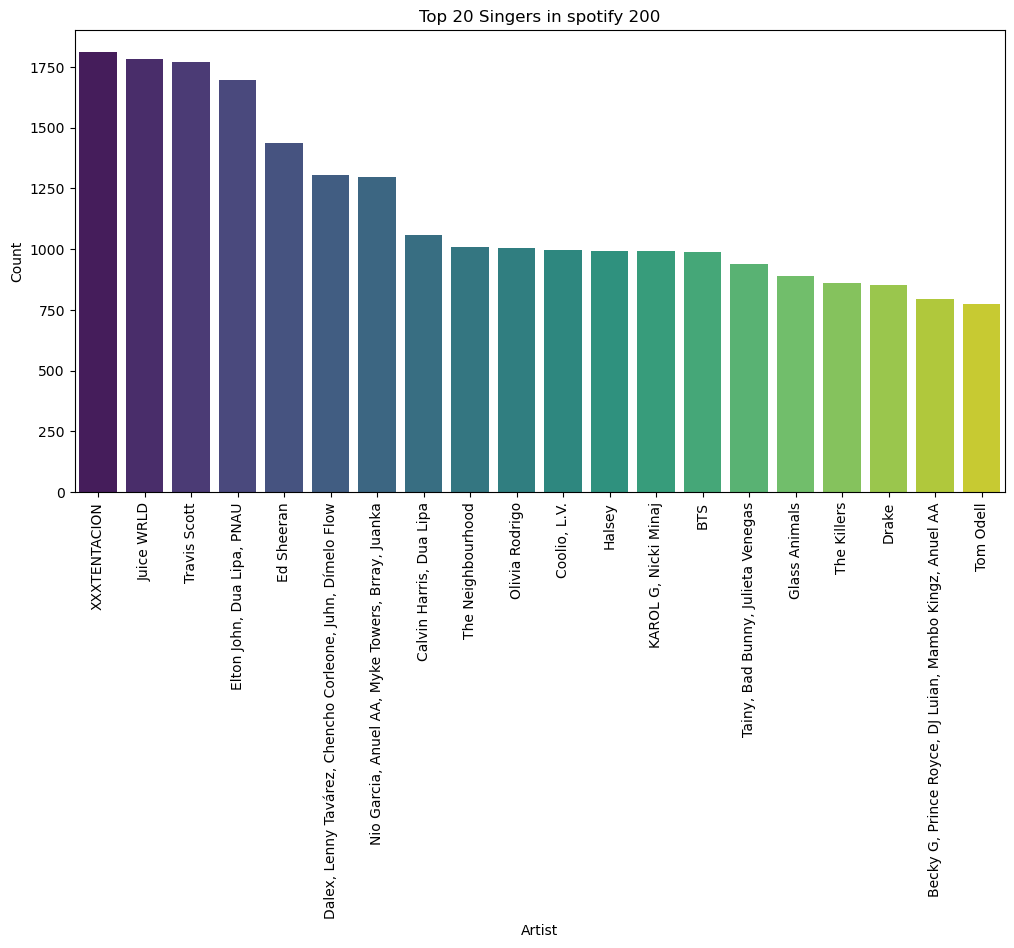

In [18]:
# Now let's check how many times an artist was in 200 
top_artists = df['Artists'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x = top_artists.index, y= top_artists.values, palette='viridis')
plt.title('Top 20 Singers in spotify 200')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

*From the above plot we can see that XXXtentacion was about 1800 times on the top 200 list of spotify*

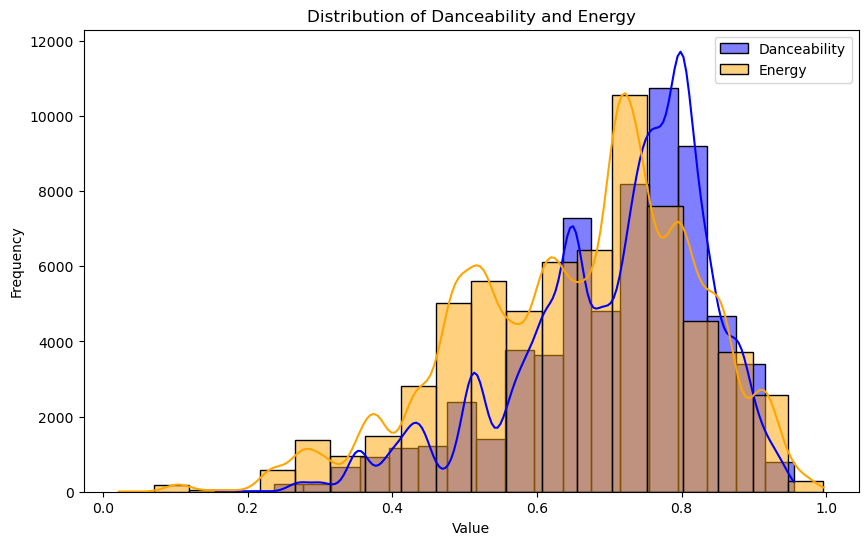

In [19]:
# Now let's plot the Distribution of Danceability and Energy
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Danceability', bins=20, kde=True, color='blue', label='Danceability')
sns.histplot(data=df, x='Energy', bins=20, kde=True, color='orange', label='Energy')
plt.title('Distribution of Danceability and Energy')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

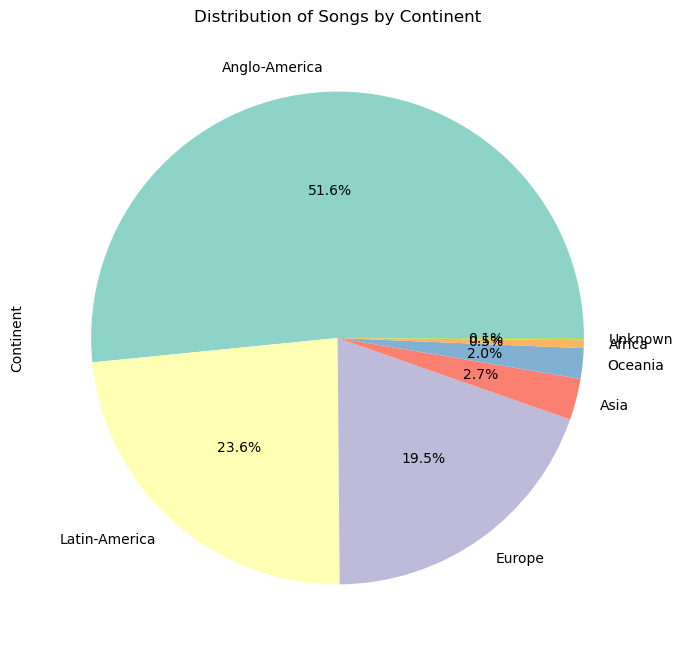

In [20]:
# Analysis of songs based on the continent
continent_counts = df['Continent'].value_counts()
plt.figure(figsize=(12, 8))
continent_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Songs by Continent')
plt.show()

*From the above plot we can see that America has more contribution by songs.*